<img src="https://www.anped.org.br/sites/default/files/images/ufcg-lateral.png" width="780" height="240" align="center"/>

## Centro de Engenharia Elétrica e Informática
## Departamento de Engenharia Elétrica
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Veloso
## Aluno(a): Fabio Victor Galdino Nascimento

# Experimento 02: Processamento Digital de Imagens

In [1]:
import cv2   as cv                   # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.
import random

In [2]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


##  Transformação de potência

Os pixels de uma imagem podem ser submetidos a uma função de transformação ponto-a-ponto, da forma $y = x^γ$ , onde um fator $γ$ positivo e maior que $1$ produzirá uma imagem resultante mais escura que a imagem original, enquanto um fator $γ$ entre $0$ e $1$ produzirá uma imagem resultante mais clara que a imagem original. No python essa função de transformação  está disponível através da função **intensity_transform.gammaCorrection** da biblioteca do OpenCv

**Sintaxe:** cv.intensity_transform.gammaCorrection (img_in, img_out, gamma)

**Descrição:** Dada uma imagem colorida (BGR) ou em tons de cinza de entrada e a constante gama, aplique a transformação de lei de potência, também conhecida como correção de gama à imagem no domínio [0, 255] e retorne a imagem resultante.

**Obs.:** Antes de executar essa função é necessário definir a imagem de saída. Para tanto,  você pode usar o seguinte comando:

img_out = np.zeros (img_in.shape, img_in.dtype),

que cria uma imagem preenchida com zeros com a mesma forma e tipo da imagem de entrada.

##  Alargamento de contraste

O alagamento de contraste é uma técnica de aprimoramento de imagem que tenta melhorar o contraste ampliando os valores de intensidade de uma imagem para preencher toda a faixa dinâmica. A função de transformação usada é sempre linear e monotonicamente crescente.

A figura abaixo mostra uma função de transformação típica usada para alongamento de contraste.

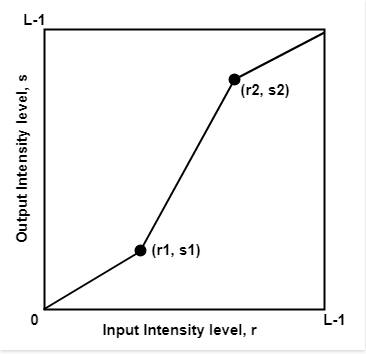

**Sintaxe:**  cv.intensity_transform.contrastStretching (img_in, img_out, r1, s1, r2, s2)

**Descrição:** Dada uma imagem colorida (BGR) ou em tons de cinza de entrada, aplique alongamento de contraste linear no domínio [0, 255] e retorne a imagem resultante.

**Parâmetros:** 

img_in ->	entrada de imagem em BGR ou em tons de cinza.

img_out ->	imagem resultante do alongamento do contraste.

r1	-> coordenada x do primeiro ponto (r1, s1) na função de transformação.

s1  ->	coordenada y do primeiro ponto (r1, s1) na função de transformação.

r2	-> coordenada x do segundo ponto (r2, s2) na função de transformação.

s2	-> coordenada y do segundo ponto (r2, s2) na função de transformação.



## Questão 01

a)	Processe a imagem **Fig0304(a)(breast_digital_Xray).tif** usando as funções de transformação abaixo:

* cv.intensity_transform.contrastStretching (img_in, g1, 0, 255, 255, 0)

* cv.intensity_transform.contrastStretching (img_in, g2, 128, 191, 0, 255)

* cv.intensity_transform.gammaCorrection (img, g3, 2)

Mostre as três imagens resultantes e comente os resultados encontrados.

Text(0.5, 1.0, 'Transformação de potência')

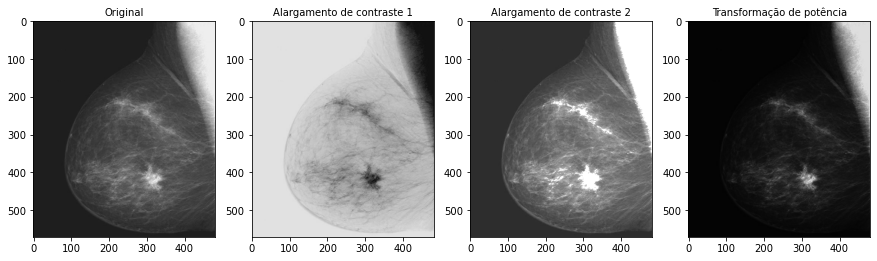

In [67]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 15))
img_in = cv.imread('Fig0304(a)(breast_digital_Xray).tif')
img_out = np.zeros (img_in.shape, img_in.dtype)

axs[0].imshow(img_in)
axs[0].set_title("Original", size=10)

cv.intensity_transform.contrastStretching(img_in, img_out, 0, 255, 255, 0)
axs[1].imshow(img_out)
axs[1].set_title("Alargamento de contraste 1", size=10)

cv.intensity_transform.contrastStretching (img_in, img_out, 128, 191, 0, 255)
axs[2].imshow(img_out)
axs[2].set_title("Alargamento de contraste 2", size=10)

cv.intensity_transform.gammaCorrection (img_in, img_out, 2)
axs[3].imshow(img_out)
axs[3].set_title("Transformação de potência", size=10)

Imagem 1: Ocorreu a inversão de cores, em relação a original, o que chamamos de "negativo".

Imagem 2: Observamos que os valores baixos permanecem iguais ao original e os de valores altos aumentaram o contraste.

Imagem 3: Observamos a transformação de potência gamma em que nessa imagem como o valor é 2, isso irá escurecer a imagem. Na próxima questão iremos clarear, colocando gamma = 0,5. Já que gamma < 1 clareia, gamma > 1 escurece.

b) 	Verifique o efeito de aplicar transformações de intensidade a uma imagem com valores de γ menores que 1 em uma imagem da sua escolha.

Text(0.5, 1.0, 'Transformação de potência')

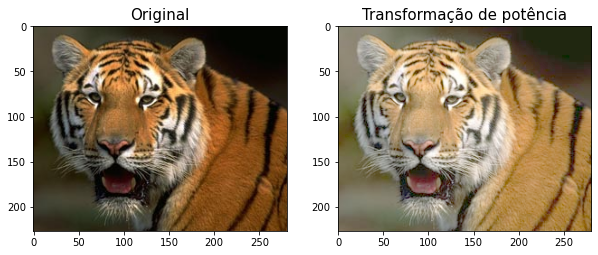

In [65]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 10))
img_in = cv.imread('tiger.jpg')
img_in = cv.cvtColor(img_in, cv.COLOR_BGR2RGB)

axs[0].imshow(img_in)
axs[0].set_title("Original", size=15)

img_out = np.zeros (img_in.shape, img_in.dtype)
cv.intensity_transform.gammaCorrection (img_in, img_out, 0.5)
axs[1].imshow(img_out)
axs[1].set_title("Transformação de potência", size=15)

## Transformações logarítmicas

As transformações logarítmicas e de alargamento de contraste são ferramentas básicas para manipulação da faixa dinâmica da imagem. Os pixels de uma imagem podem ser submetidos a uma função de transformação logarítmica ponto-a-ponto, da forma $y = log ( 1 + x )$, através do comando **cv.intensity_transform.logTransform** da biblioteca do OpenCv

**Sintaxe:** cv.intensity_transform.logTransform (img_in, img_out)

**Descrição:** Dada uma imagem BGR ou em tons de cinza de entrada, aplique a transformação de log à imagem no domínio [0, 255] e retorne a imagem resultante.

**Parâmetros:**

img_in ->  imagem de entrada BGR ou em tons de cinza.

img_out -> imagem resultante de transformações de log.


## Questão 02

a.)	Processe a imagem **face.bmp** usando as funções de transformação abaixo:

    * F1=2f-40
    * F2=30log10(f+1)
    * F3=f^1.4
    * F4=f^0.6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'F4')

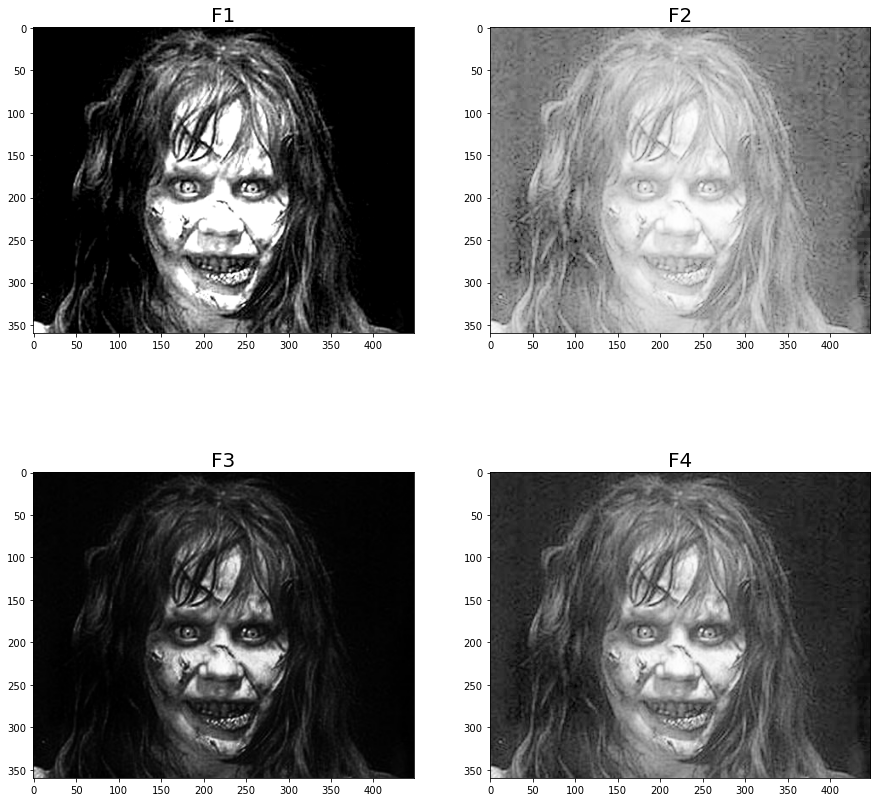

In [96]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 15))
f = cv.imread('face.bmp')

F1 = np.zeros(f.shape, f.dtype)
F2 = np.zeros(f.shape, f.dtype)
F3 = np.zeros(f.shape, f.dtype)
F4 = np.zeros(f.shape, f.dtype)

F1=2*f.astype('int32')-40

cv.intensity_transform.logTransform (f, F2)

cv.intensity_transform.gammaCorrection (f, F3, 1.4)

cv.intensity_transform.gammaCorrection (f, F4, 0.6)

axs[0,0].imshow(F1)
axs[0,0].set_title("F1", size=20)
axs[0,1].imshow(F2)
axs[0,1].set_title("F2", size=20)
axs[1,0].imshow(F3)
axs[1,0].set_title("F3", size=20)
axs[1,1].imshow(F4)
axs[1,1].set_title("F4", size=20)

b.)	Processe a imagem **Fig0305(a)(DFT_no_log).tif** usando a transformação logarítmica.  Analise e comente os resultados.

Text(0.5, 1.0, 'Transformação Logarítmica')

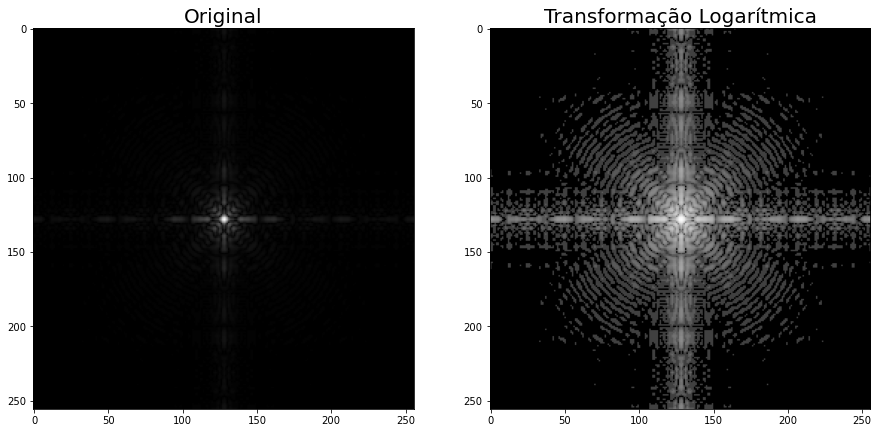

In [61]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 15))

img_in = cv.imread('Fig0305(a)(DFT_no_log).tif')
img_out = np.zeros(img_in.shape, img_in.dtype)


cv.intensity_transform.logTransform (img_in, img_out)
                                        
axs[0].imshow(img_in)
axs[0].set_title("Original", size=20)
axs[1].imshow(img_out)
axs[1].set_title("Transformação Logarítmica", size=20)

Nessa transformação os pretos ficam mais brancos e os brancos continuam mais ou menos brancos. Servindo para mapear intervalos estreitos de valores de baixa intensidade e deixar em alta. Ou seja, clarear as imagens para facilitar a visualização. 

## Cálculo do Histogramas

O histograma é uma ferramenta estatística, também  conhecida como distribuição de frequências,  que representa graficamente a distribuição dos dados em classes (ou bins). Podemos usar a função **calcHist** da biblioteca do OpenCV para calcular o histograma de uma imagem.

**Sintaxe**: hist = cv.calcHist(images, channels, mask, histSize, ranges, accumulate)

**Descrição**:  calcula o histograma de uma ou mais matrizes. 

**Parâmetros**:

images -> matriz de entrada (imagem de entrada)

channels -> Lista das dimensões dos canais usados para calcular o histograma

mask -> Máscara opcional. Se a matriz não estiver vazia, deve ser uma matriz de 8 bits com o mesmo tamanho das imagens[i] . Os elementos da máscara não-zero marcam os elementos da matriz contados no histograma. 

histSize -> Histograma de saída, que é uma matriz densa ou esparsa dims -dimensional.

ranges ->Matriz com as dimensões da caixa de histograma.

accmulate -> Bandeira de acumulação (Nesse experimento usamos False).

Para maiores detalhes: https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d


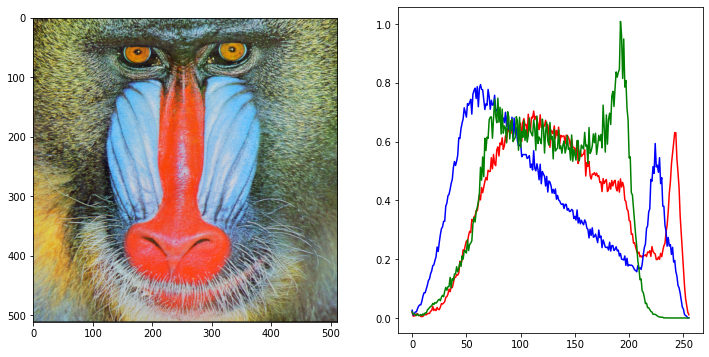

In [3]:
#read image
im=cv.imread('mandrill.tiff')

if im is None:
    print('Could not open or find the image:', args.input)
    exit(0)
    
#Divides a multi-channel array into several single-channel arrays.   
im_planes = cv.split(im) 

histSize = 256

histRange = (0, 256) # the upper boundary is exclusive

accumulate = False
    
b_hist = cv.calcHist(im_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(im_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(im_planes, [2], None, [histSize], histRange, accumulate=accumulate)    

[M, N, channels] = im.shape
    
r_hist=100 * r_hist/(M*N)
g_hist=100 * g_hist/(M*N)
b_hist=100 * b_hist/(M*N)

#show image

im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
axs[0].imshow(im, vmin=im.min(), vmax=im.max())
fig.set_figheight(6)
fig.set_figwidth(12)
axs[1].plot(r_hist,'r')
axs[1].plot(b_hist,'b')
axs[1].plot(g_hist,'g')


## Equalização de histogramas

Para aprimorar o contraste de uma imagem, uma das técnicas mais comum é a equalização de histograma. Esta equalização reorganiza os valores de intensidade da imagem, produzindo imagens com histogramas mais lconstantes. Podemos usar a função **equalizeHist** da biblioteca do OpenCV para equalizar imagens em escala de cinza.

**Sintaxe**: im_out = cv.equalizeHist(im_in)

**Descrição**:  Equaliza a imagem de entrada

**Parâmetros** 

im_in -> imagem a ser equalizada com 8 bits com apenas 1 canal
im_out -> imagem equalizada do mesmo tipo e tamanho da imagem de entrada
 

Text(0.5, 1.0, 'Imagem YCrCb equalizada')

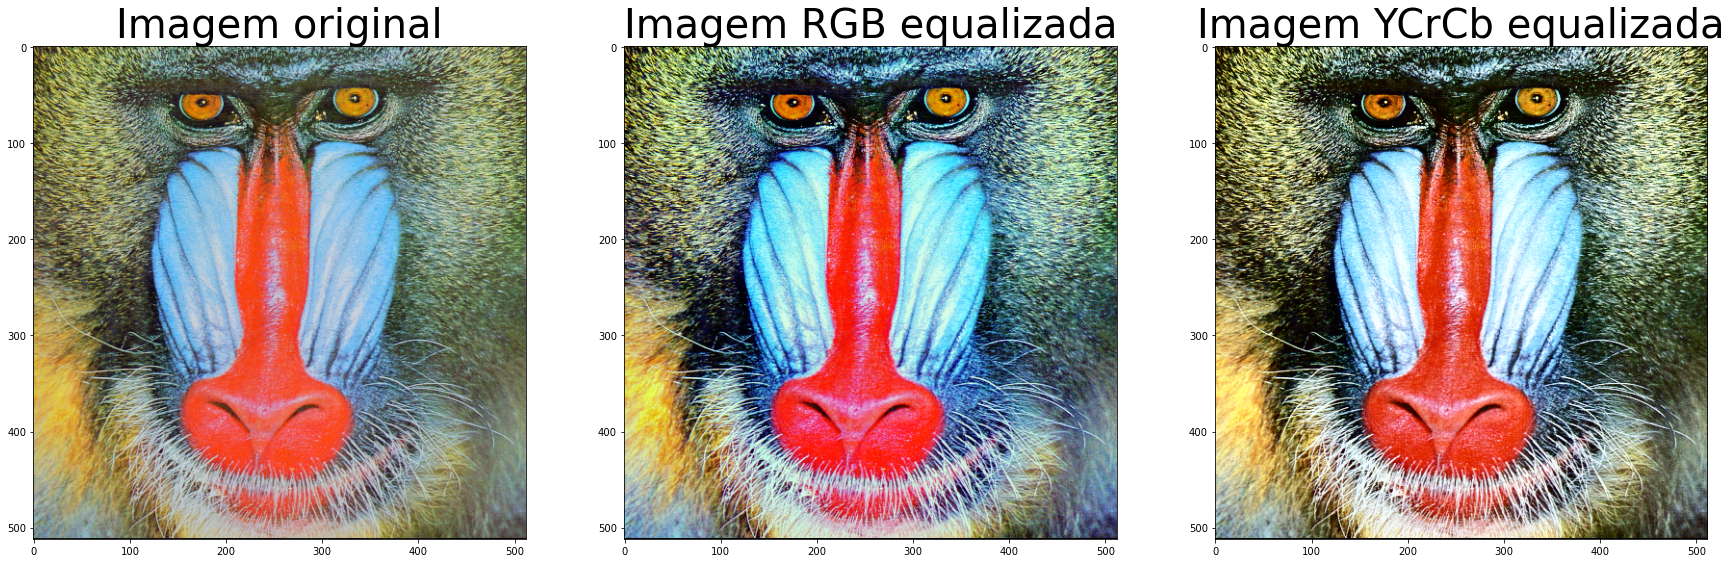

In [5]:
#read image
im=cv.imread('mandrill.tiff')

if im is None:
    print('Could not open or find the image:', args.input)
    exit(0)
    
# equalize the histogram of the BGR image
im_eq = np.zeros(im.shape, im.dtype)

im_eq[:,:,0] = cv.equalizeHist(im[:,:,0])
im_eq[:,:,1] = cv.equalizeHist(im[:,:,1])
im_eq[:,:,2] = cv.equalizeHist(im[:,:,2])


# equalize the histogram of the Y channel
im_yuv_eq = cv.cvtColor(im, cv.COLOR_BGR2YCrCb)

im_yuv_eq[:,:,0] = cv.equalizeHist(im_yuv_eq[:,:,0])

#show image
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
im_eq = cv.cvtColor(im_eq, cv.COLOR_BGR2RGB)
im_yuv_eq = cv.cvtColor(im_yuv_eq, cv.COLOR_YCrCb2RGB)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,30))
axs[0].imshow(im, vmin=im.min(), vmax=im.max())
axs[0].set_title("Imagem original", size=40)
axs[1].imshow(im_eq, vmin=im.min(), vmax=im.max())
axs[1].set_title("Imagem RGB equalizada",size=40)
axs[2].imshow(im_yuv_eq, vmin=im.min(), vmax=im.max())
axs[2].set_title("Imagem YCrCb equalizada", size=40)

## Questão 03

a) Converta a imagem **"babuino.jpg"** para nível de cinza e equalize essa imagem. Mostre a imagem em nível de cinza e a imagem equalizada e seus respectivo histogramas. Descreva o que ocorreu com a imagem equalizada.

Text(0.5, 1.0, 'Histograma Equalizado Cinza')

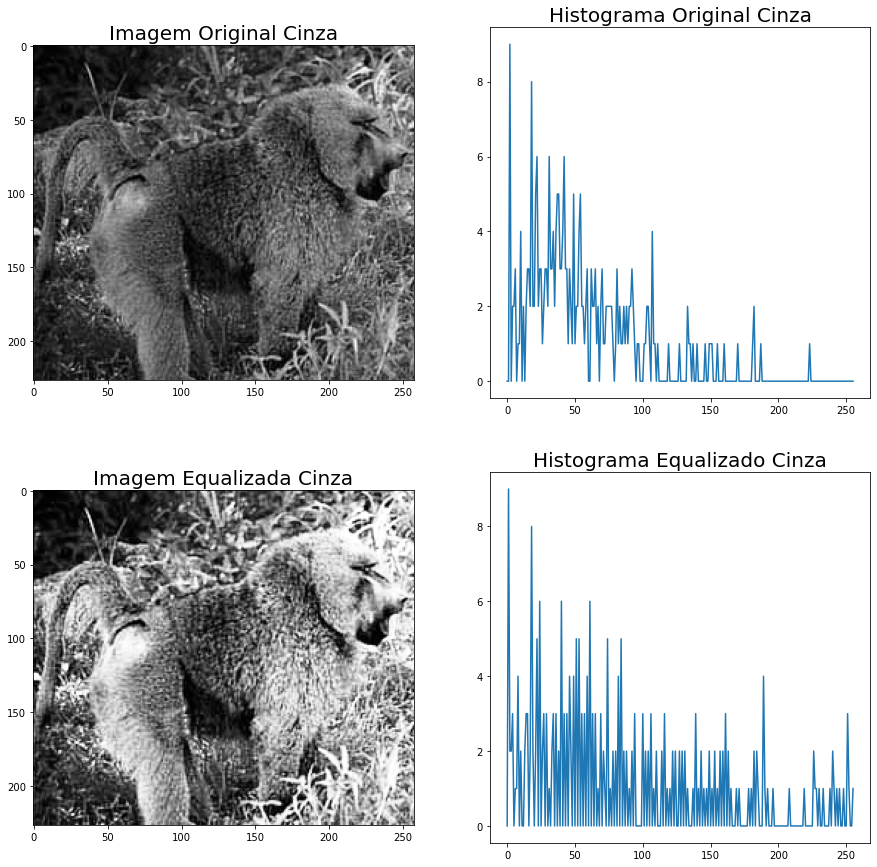

In [58]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 15))
img = cv.imread('babuino.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray_eq = cv.equalizeHist(img_gray)

axs[0,0].imshow(img_gray,"gray")
axs[0,0].set_title("Imagem Original Cinza", size=20)
axs[1,0].imshow(img_gray_eq,"gray")
axs[1,0].set_title("Imagem Equalizada Cinza", size=20)

gray_hist = cv.calcHist(img_gray, [0], None, [256], (0,256), accumulate = False) 
gray_hist_eq = cv.calcHist(im_gray_eq, [0], None, [256], (0,256), accumulate = False) 

axs[0,1].plot(gray_hist)
axs[0,1].set_title("Histograma Original Cinza", size=20)
axs[1,1].plot(gray_hist_eq)
axs[1,1].set_title("Histograma Equalizado Cinza", size=20)

Quando aplicamos a equalização de histogramas é como nós tivéssemos expandido o gráfico, assim melhorando o contraste da imagem e permitindo que alguns detalhes sejam destacados. 

b) O que acontece se a imagem equalizada for equalizada diversas vezes? Teste e comente os resultados.

Text(0.5, 1.0, 'Equalização 4')

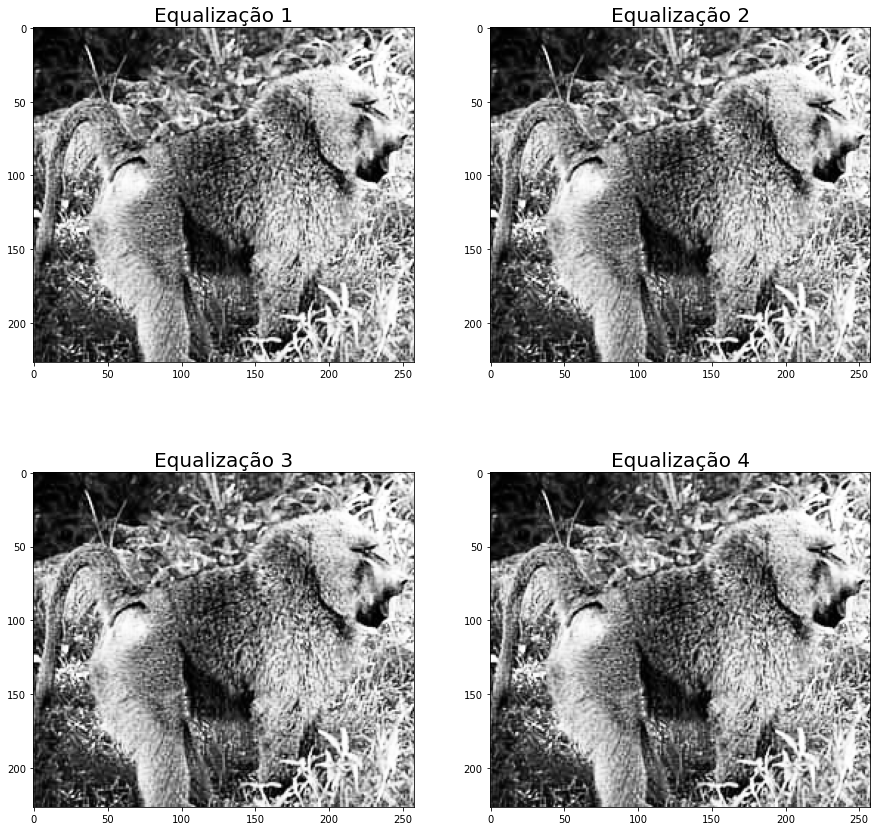

In [55]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 15))

img_eq = cv.equalizeHist(img_gray)
img_eq1 = cv.equalizeHist(img_eq)
img_eq2 = cv.equalizeHist(img_eq1)
img_eq3 = cv.equalizeHist(img_eq2)

axs[0,0].imshow(img_eq,"gray")
axs[0,0].set_title("Equalização 1", size=20)
axs[0,1].imshow(img_eq1,"gray")
axs[0,1].set_title("Equalização 2", size=20)
axs[1,0].imshow(img_eq2,"gray")
axs[1,0].set_title("Equalização 3", size=20)
axs[1,1].imshow(img_eq3,"gray")
axs[1,1].set_title("Equalização 4", size=20)

Nada ocorre, visto que, os pixels já estavam bem distribuídos e esse é o objetivo da equalização. 

## Filtragem espacial

A operação de filtragem espacial é realizada pela função **filter2D()** da bibioteca OpenCV, que realiza a operação de convolução de uma imagem com uma máscara (elemento estruturante).

**Sintaxe:** im_out	=cv.filter2D(im_in, ddepth, kernel)

**Descrição:** Realiza a operação de filtragem linear entre a imagem de entrada e a máscara

**Parametros**:

im_in	-> imagem de entrada.

im-out	-> imagem de saída de mesmo tamanho e o mesmo número de canais que im_in.

ddepth	-> profundidade desejada da imagem de destino.

kernel	-> máscara de convolução (ou melhor, um kernel de correlação), uma matriz de ponto flutuante de um único canal; se você quiser aplicar diferentes núcleos a diferentes canais, divida a imagem em planos de cores separados  e processe-os individualmente.




Text(0.5, 1.0, 'Imagem filtrada com o filtro da média')

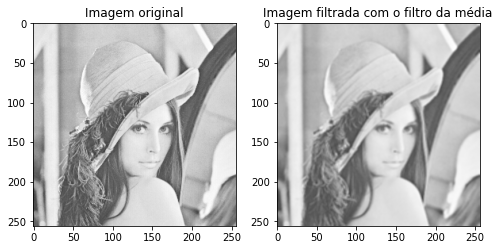

In [7]:
#read image
im=cv.imread('lenna.tif')

if im is None:
    print('Could not open or find the image:', args.input)
    exit(0)

#Mean filter kernel, size=3x3   
kernel = np.ones((3,3),np.float32)/9

#Image Filtering
im_out = cv.filter2D(im,-1,kernel)

#show image
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
axs[0].imshow(im)
axs[0].set_title("Imagem original", size=12)
axs[1].imshow(im_out)
axs[1].set_title("Imagem filtrada com o filtro da média",size=12)
 

## Suavização de imagens

Uma das aplicações mais comuns das técnicas de processamento de imagens é na área de remoção de ruídos e aprimoramento da qualidade de uma imagem. Nesta prática abordaremos três técnicas de remoção de ruído, que equivalem a filtros passa-baixa, que são:
* Filtragem pela média: nesta técnica, o pixel central de uma janela  é substituído pela média dos valores de intensidade de seus vizinhos. Isso pode ser feito plea função **im_out=	cv.blur(im_in, size)**.
* Filtragem pela mediana: nesta técnica, o pixel central de uma janela é substituído pela mediana dos valores de intensidade de seus vizinhos. Isso pode ser feito plea função **im_out	=	cv.medianBlur(im_in, ksize)**.

* Filtragem Gaussiana: nesta técnica, o pixel central de uma janela é substituído pelo resultado da convolucão da imagem com uma máscara Gaussiana com determinado desvio padrão. Isso pode ser feito plea função **im_out	=	cv.GaussianBlur(im_in, size, sigma)**.

Para maiores detalhes dessas funções consulte https://docs.opencv.org/4.5.2/index.html

Text(0.5, 1.0, 'Imagem filtrada com o filtro Gaussiano')

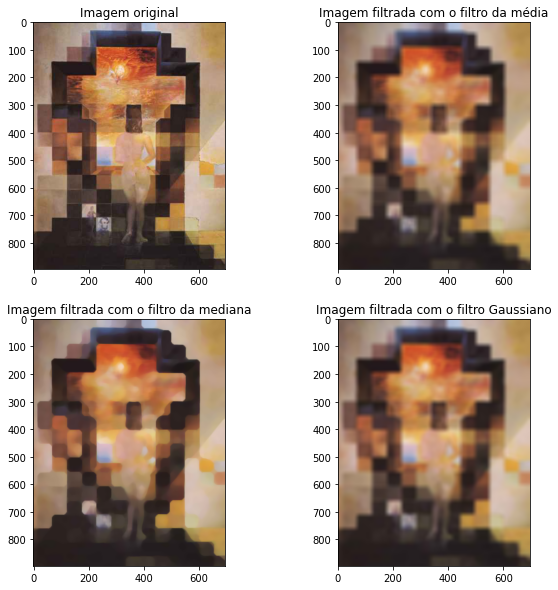

In [8]:
#read image
im=cv.imread('dali.png')

if im is None:
    print('Could not open or find the image:', args.input)
    exit(0)

#Mean filter, size=3x3   
nsize=21
size = (nsize,nsize)
sigma = 10
im_out1 = cv.blur(im,size)
im_out2 = cv.medianBlur(im, nsize)
im_out3 = cv.GaussianBlur(im, size, sigma)

#BGR2RGB
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
im_out1 = cv.cvtColor(im_out1, cv.COLOR_BGR2RGB)
im_out2 = cv.cvtColor(im_out2, cv.COLOR_BGR2RGB)
im_out3 = cv.cvtColor(im_out3, cv.COLOR_BGR2RGB)

#show image
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axs[0,0].imshow(im)
axs[0,0].set_title("Imagem original", size=12)
axs[0,1].imshow(im_out1)
axs[0,1].set_title("Imagem filtrada com o filtro da média",size=12)
axs[1,0].imshow(im_out2)
axs[1,0].set_title("Imagem filtrada com o filtro da mediana",size=12)
axs[1,1].imshow(im_out3)
axs[1,1].set_title("Imagem filtrada com o filtro Gaussiano",size=12)

## Questão 04

Nessa questão vamos avaliar os filtros da média, da mediana e o gaussiano na filtragem de imagens com ruído sal e pimenta na imagem **boat.512.tiff**. Portanto, incialmente aplique o ruido sal e pimenta na imagem, para tanto utilize o seguinte comando **im_noise = sp_noise(im, 0.05)**. A seguir, utilize os filtros da média, da mediana e o gaussiano para filtrar esse ruído, escolha os seus parâmetros com cuidado, para reduzir o ruído sem comprometer a imagem.

Text(0.5, 1.0, 'Imagem Com Ruído')

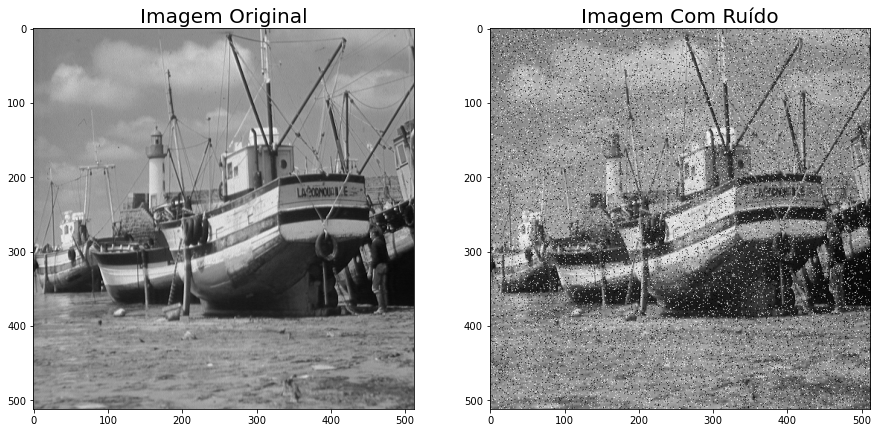

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,15))

img = cv.imread('boat.512.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_ruido = sp_noise(img, 0.05)

axs[0].imshow(img)
axs[0].set_title("Imagem Original", size=15)
axs[1].imshow(img_ruido)
axs[1].set_title("Imagem Com Ruído", size=15)

Text(0.5, 1.0, 'Filtro Gaussiano')

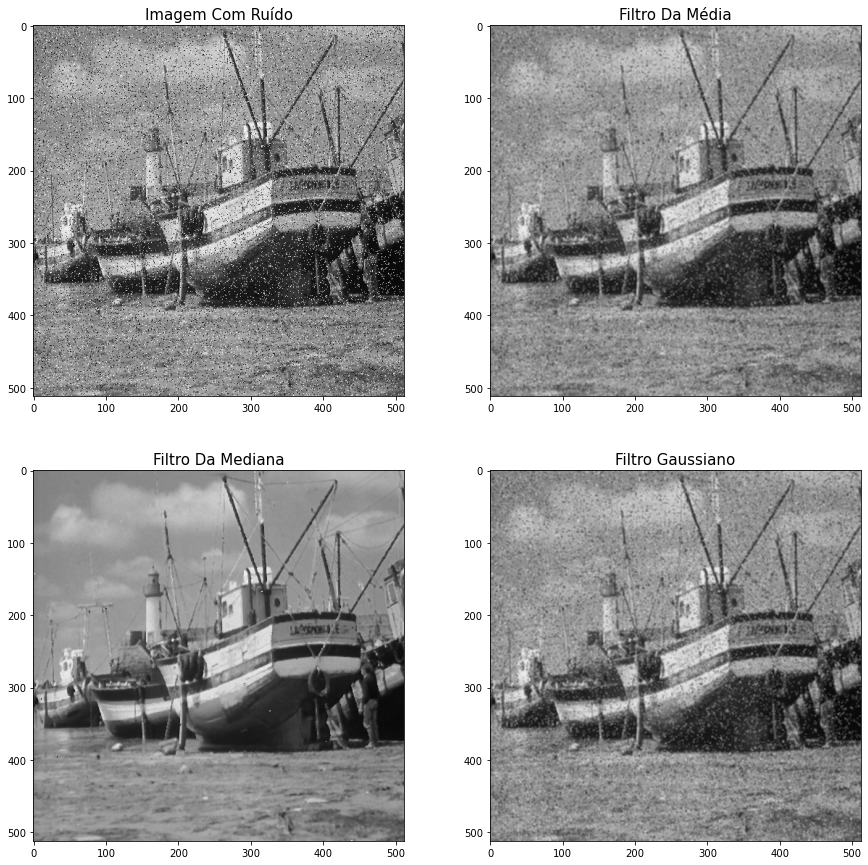

In [94]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

nsize=3
size = (nsize,nsize)
sigma = 10
im_out1 = cv.blur(img_ruido,size)
im_out2 = cv.medianBlur(img_ruido, (nsize))
im_out3 = cv.GaussianBlur(img_ruido, size, sigma)

axs[0,0].imshow(img_ruido)
axs[0,0].set_title("Imagem Com Ruído", size=15)
axs[0,1].imshow(im_out1)
axs[0,1].set_title("Filtro Da Média",size=15)
axs[1,0].imshow(im_out2)
axs[1,0].set_title("Filtro Da Mediana",size=15)
axs[1,1].imshow(im_out3)
axs[1,1].set_title("Filtro Gaussiano",size=15)

## Aguçamento de imagens

As bordas e outras mudanças abruptas de intensidade em imagens são associadas a componentes de alta frequência. O aguçamento de imagens tem como objetivo destacar essas saliências nas imagens. Os filtros desse processo realizam a diferenciação de uma imagem, realçando as bordas e outras descontinuidades (**como o ruído**) enquanto atenua as áreas com intensidades de variação mais suave. O gradiente de sobel é um exemplo, ele consite na operação de convloução da imagem com  duas máscaras $g_x$ e $g_y$. Após o processo de convloção deve-se calcular o valor absoluto do resultado. 
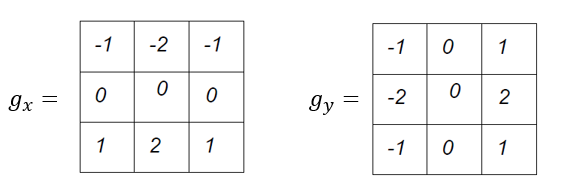



Text(0.5, 1.0, 'Imagem filtrada com o filtro $|Gx|+|Gy|$')

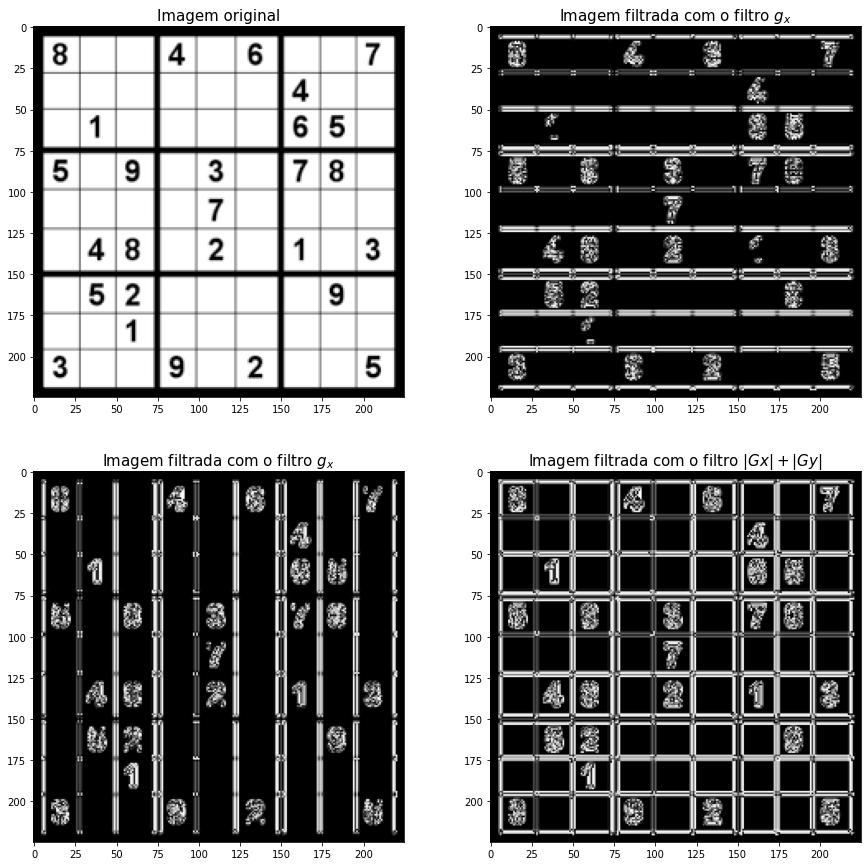

In [4]:
#read image
im=cv.imread('sudoku.png')
if im is None:
    print('Could not open or find the image:', args.input)
    exit(0)
    
im1 = im.astype(np.int16)
    
# filter kernel    
gx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#filter
Gx = abs(cv.filter2D(im1,-1,gx))
Gy = abs(cv.filter2D(im1,-1,gy))
im_out = Gx+Gy

Gx = Gx.astype(np.uint8)
Gy = Gy.astype(np.uint8)
im_out = im_out.astype(np.uint8)

#show image
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs[0,0].imshow(im)
axs[0,0].set_title("Imagem original", size=15)
axs[0,1].imshow(Gx)
axs[0,1].set_title("Imagem filtrada com o filtro $g_x$",size=15)
axs[1,0].imshow(Gy)
axs[1,0].set_title("Imagem filtrada com o filtro $g_x$",size=15)
axs[1,1].imshow(im_out)
axs[1,1].set_title("Imagem filtrada com o filtro $|Gx|+|Gy|$",size=15)

## Questão 05

a)Implemente a filtragem conforme foi descrito na aula e por conviniência mostrado no slide abaixo.Teste sua implementação na imagem **Fig0340(a)(dipxe_text).tif**. Utilize como filtro passa baixa o filtro gaussiano.

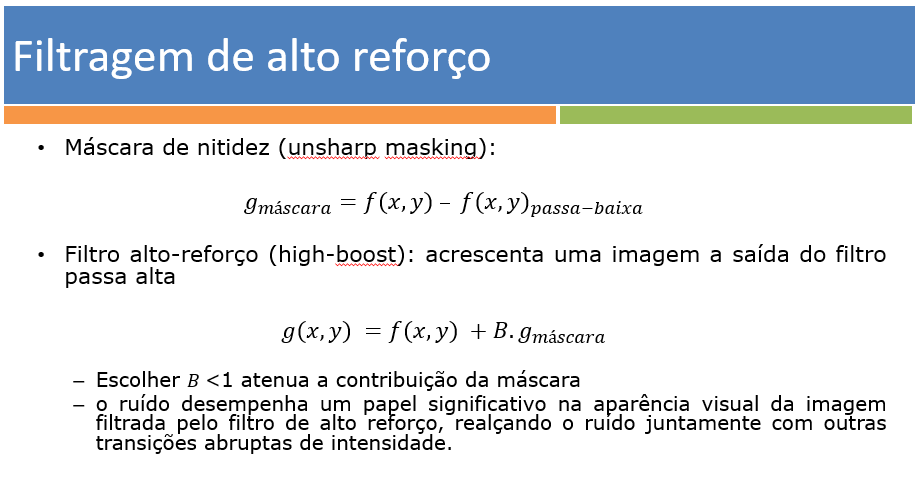


Text(0.5, 1.0, 'Filtro Alto Reforço + Máscara De Nitidez')

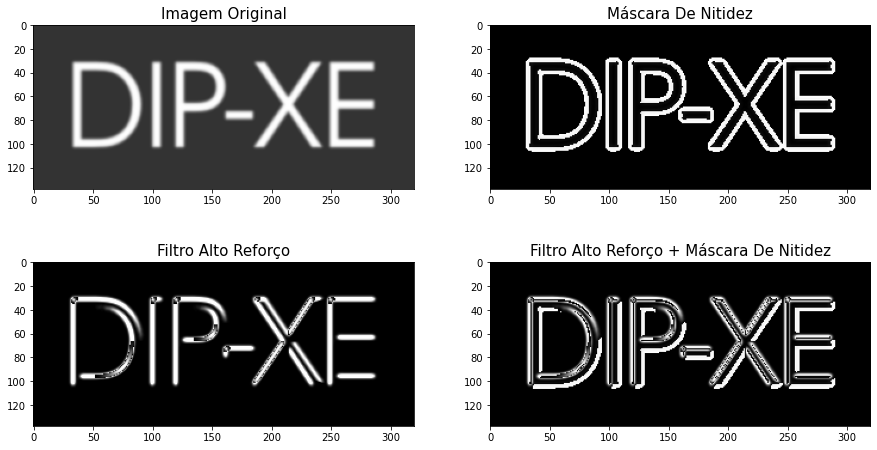

In [91]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

img = cv.imread('Fig0340(a)(dipxe_text).tif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

Filtro_PB = cv.GaussianBlur(img, (3,3), 10)
Macara_Nitidez = img - Filtro_PB 
    
gx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

Gx = abs(cv.filter2D(img,-1,gx))
Gy = abs(cv.filter2D(img,-1,gy))

Alto_Reforco = Gx+Gy

axs[0,0].imshow(img)
axs[0,0].set_title("Imagem Original", size=15)
axs[0,1].imshow(Macara_Nitidez)
axs[0,1].set_title("Máscara De Nitidez", size=15)
axs[1,0].imshow(Alto_Reforco)
axs[1,0].set_title("Filtro Alto Reforço",size=15)
axs[1,1].imshow(Macara_Nitidez + Alto_Reforco)
axs[1,1].set_title("Filtro Alto Reforço + Máscara De Nitidez",size=15)